In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the datasets
customers_df = pd.read_csv("/content/Customers.csv")
products_df = pd.read_csv("/content/Products.csv")
transactions_df = pd.read_csv("/content/Transactions.csv")

# Displaying head and info to inspect the datasets
print("Customers DataFrame:")
print(customers_df.head())
print(customers_df.info())

print("\nProducts DataFrame:")
print(products_df.head())
print(products_df.info())

print("\nTransactions DataFrame:")
print(transactions_df.head())
print(transactions_df.info())

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiv

In [12]:
customers_df = customers_df.set_index('CustomerID')
products_df = products_df.set_index('ProductID')

In [13]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

In [15]:
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')

In [16]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


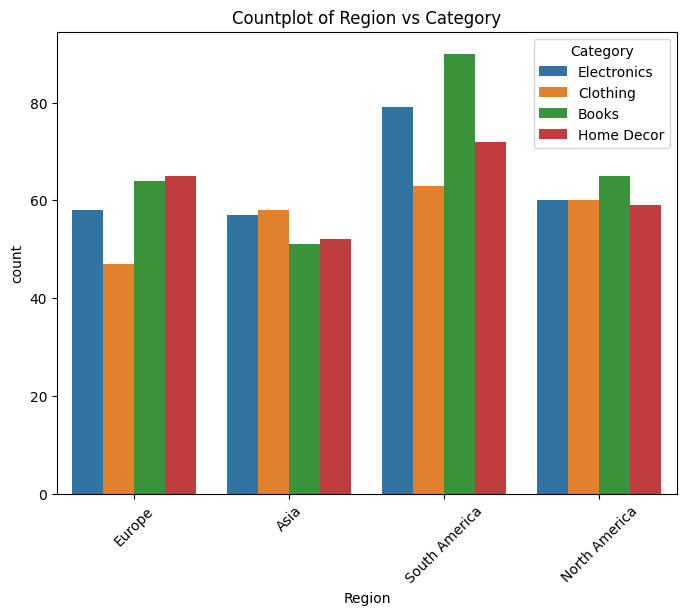

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Region', hue='Category')
plt.title('Countplot of Region vs Category')
plt.xticks(rotation=45)
plt.show()

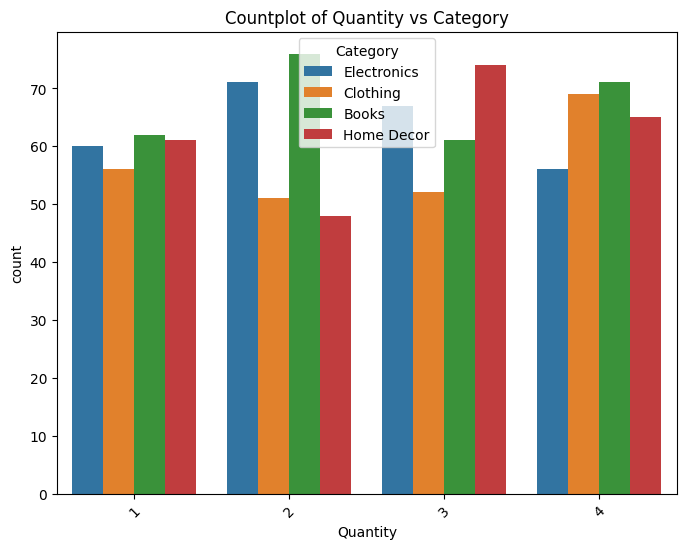

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Quantity', hue='Category')
plt.title('Countplot of Quantity vs Category')
plt.xticks(rotation=45)
plt.show()

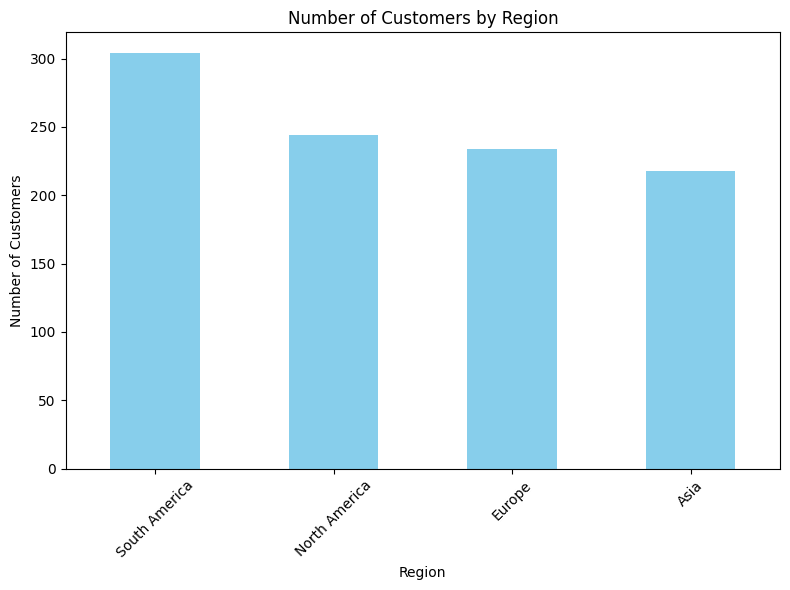

In [20]:
# 1. Regional Customer Base
region_counts = merged_df['Region'].value_counts()
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color = 'skyblue')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

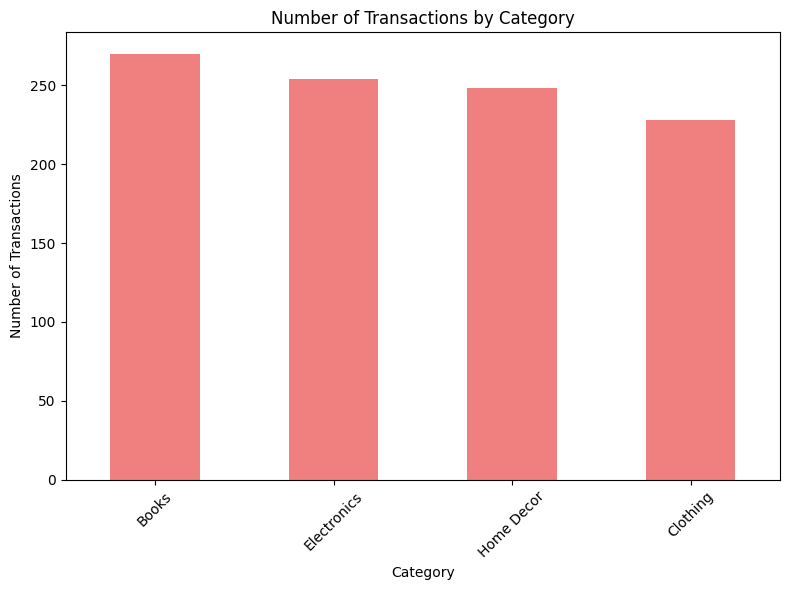

In [21]:
# 2. Electronics Category Lead
category_counts = merged_df['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color= 'lightcoral')
plt.title('Number of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

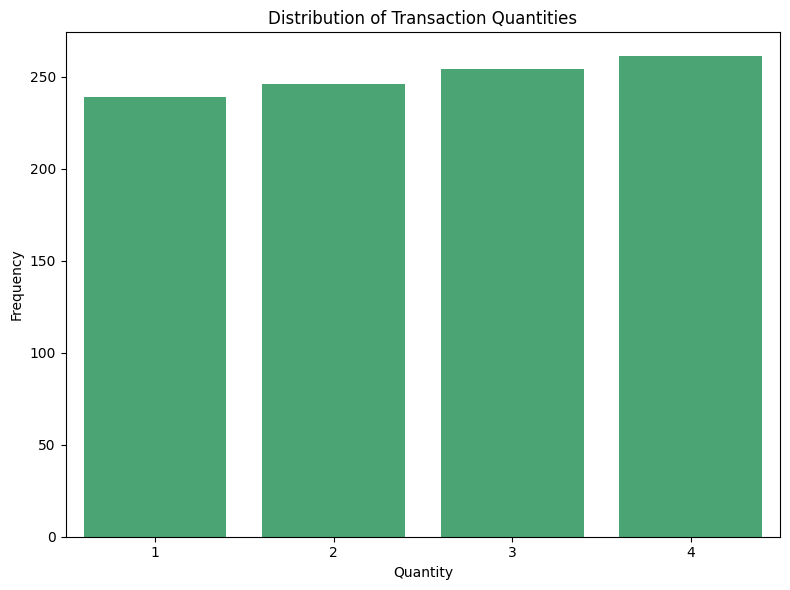

In [22]:
# 3. Variable Transaction Quantities
plt.figure(figsize=(8, 6))
sns.countplot(data = merged_df, x = 'Quantity', color = 'mediumseagreen')
plt.title("Distribution of Transaction Quantities")
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

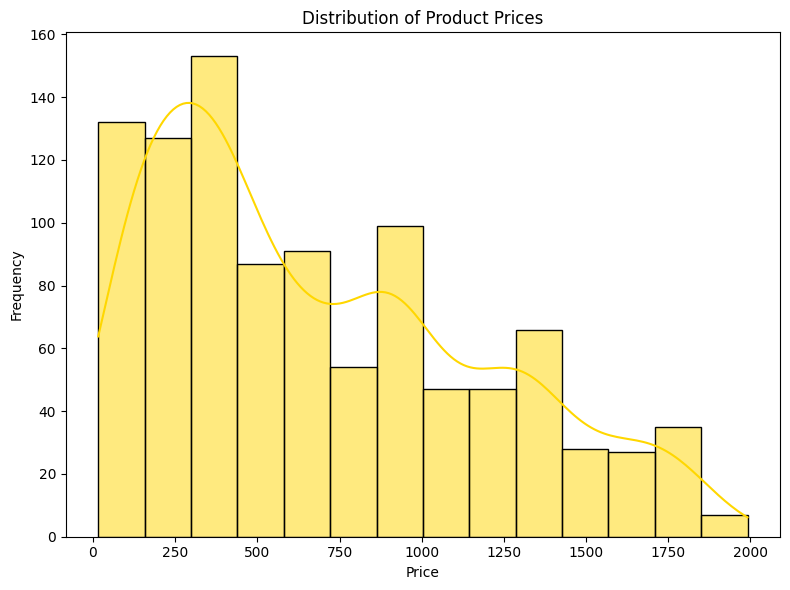

In [24]:
# 4. Product Price Disparity
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['TotalValue'], kde=True, color='gold')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

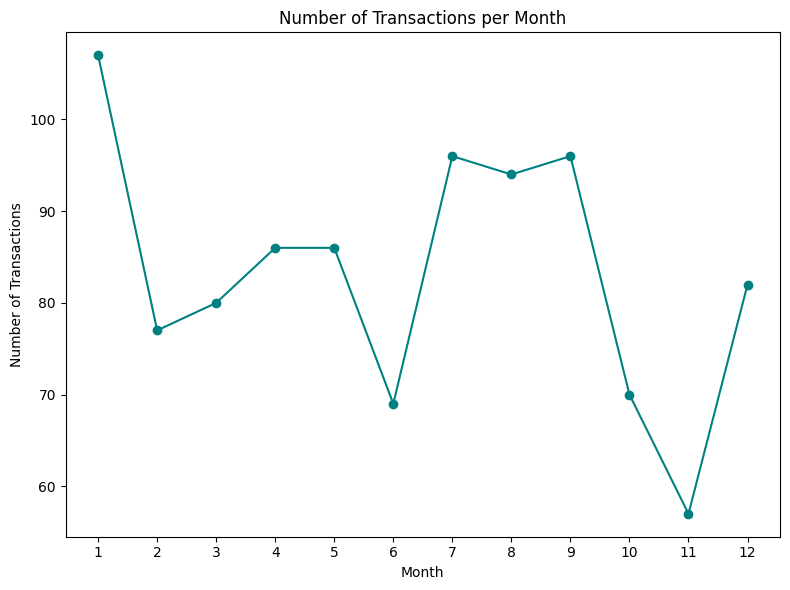

In [27]:
# 5. Transaction Dates Throughout Year
# Convert date columns to datetime objects
merged_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.month
monthly_transactions = merged_df.groupby('TransactionMonth')['TransactionMonth'].count()
plt.figure(figsize=(8, 6))
monthly_transactions.plot(kind='line', marker='o', color = 'teal')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()